In [1]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib as mpl
mpl.style.use('fivethirtyeight')

<IPython.core.display.Javascript object>


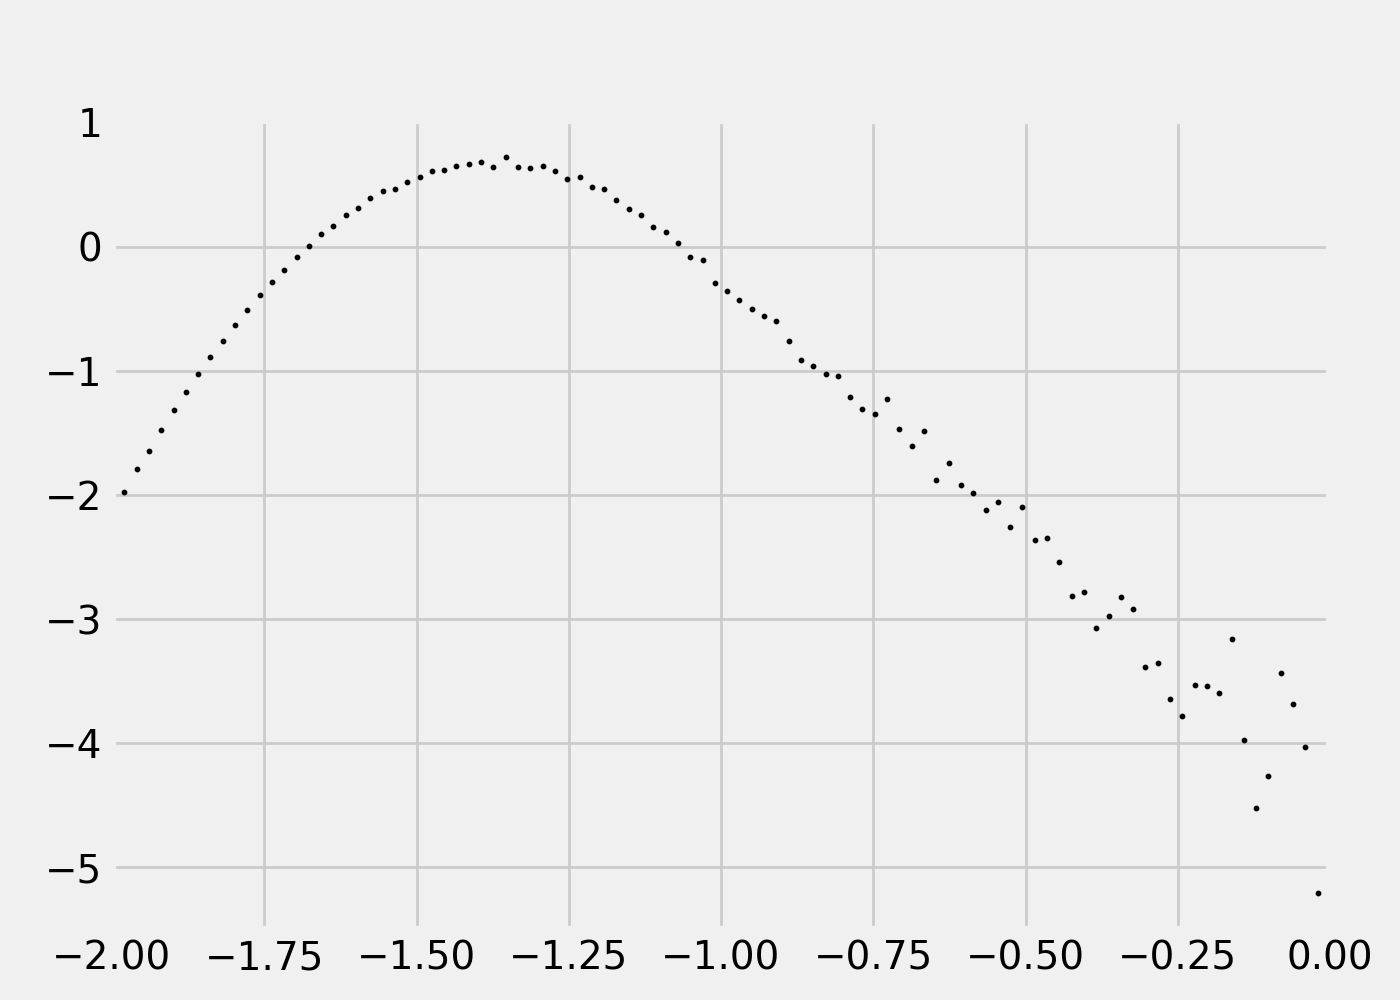

In [33]:

data_N = 100
data_min = 22
data_max = 24
data_sigma = 0.5 #noise

x = np.logspace(data_min,data_max,data_N)/1e24

true_sigman = 0.4
true_an = np.mean(x)
true_mun = -3
true_mp = -4
true_break = 10**(-1)

def lognorm_func(x,an=true_an, mun=true_mun, sigman=true_sigman):
    y = np.copy(x)
    y = (an/(np.sqrt(2*np.pi)*sigman*x))*np.exp(-1*(np.log(x)-mun)**2/(2*sigman**2))
    return y

def lognorm_powerlaw_func(x,an=true_an, mun=true_mun, sigman=true_sigman, mp=true_mp, pbreak=true_break):
    y = np.copy(x)
    y[np.where(x<pbreak)] = np.log10((an/(np.sqrt(2*np.pi)*sigman*x[np.where(x<pbreak)]))*np.exp(-1*(np.log(x[np.where(x<pbreak)])-mun)**2/(2*sigman**2)))
    y[np.where(x>=pbreak)] = (np.log10(x[np.where(x>=pbreak)])*mp + np.log10(((an/(np.sqrt(2*np.pi)*sigman*pbreak))*np.exp(-1*(np.log(pbreak)-mun)**2/(2*sigman**2)))) - (mp*np.log10(pbreak)))
    return y

y_clean = lognorm_powerlaw_func(x)
noise = np.random.normal(0,data_sigma,data_N)

y = np.nan_to_num(y_clean+noise*x)
fig,ax = plt.subplots(figsize=(7,5))
ax.set_xlim(np.log10(min(x)),np.log10(max(x)))
#ax.set_ylim(-5,2)
ax.scatter(np.log10(x),y,color='k',marker='.',s=10)


In [34]:
# true_sigman = 0.4
# true_an = np.mean(x)
# true_mun = -3
# true_mp = -4
# true_break = 10**(-1)

model_obj = lmfit.Model(lognorm_powerlaw_func)
result = model_obj.fit(y,x=x,an=0.05,mun=-3.4,sigman=0.3,mp=-4.5,pbreak=0.15)
uncs = result.eval_uncertainty()

fit_x0 = result.params['pbreak'].value
fit_an = result.params['an'].value
fit_mun = result.params['mun'].value
fit_sigman = result.params['sigman'].value
fit_mp = result.params['mp'].value
fit_pbreak = result.params['pbreak'].value

print(result.fit_report())
result.params['mp'].value

[[Model]]
    Model(lognorm_powerlaw_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 59
    # data points      = 100
    # variables        = 5
    chi-square         = 2.92542496
    reduced chi-square = 0.03079395
    Akaike info crit   = -343.173043
    Bayesian info crit = -330.147192
[[Variables]]
    an:      0.21834826 +/- 0.01791924 (8.21%) (init = 0.05)
    mun:    -2.99821975 +/- 0.03502607 (1.17%) (init = -3.4)
    sigman:  0.40054658 +/- 0.01123099 (2.80%) (init = 0.3)
    mp:     -4.18483150 +/- 0.07584290 (1.81%) (init = -4.5)
    pbreak:  0.08314484 +/- 9.88529636 (11889.25%) (init = 0.15)
[[Correlations]] (unreported correlations are < 0.100)
    C(mun, sigman)    = 0.897
    C(mun, pbreak)    = -0.788
    C(an, pbreak)     = -0.655
    C(sigman, pbreak) = -0.636
    C(an, mun)        = 0.469
    C(mp, pbreak)     = -0.453
    C(an, sigman)     = 0.198


-4.184831495029186

<IPython.core.display.Javascript object>


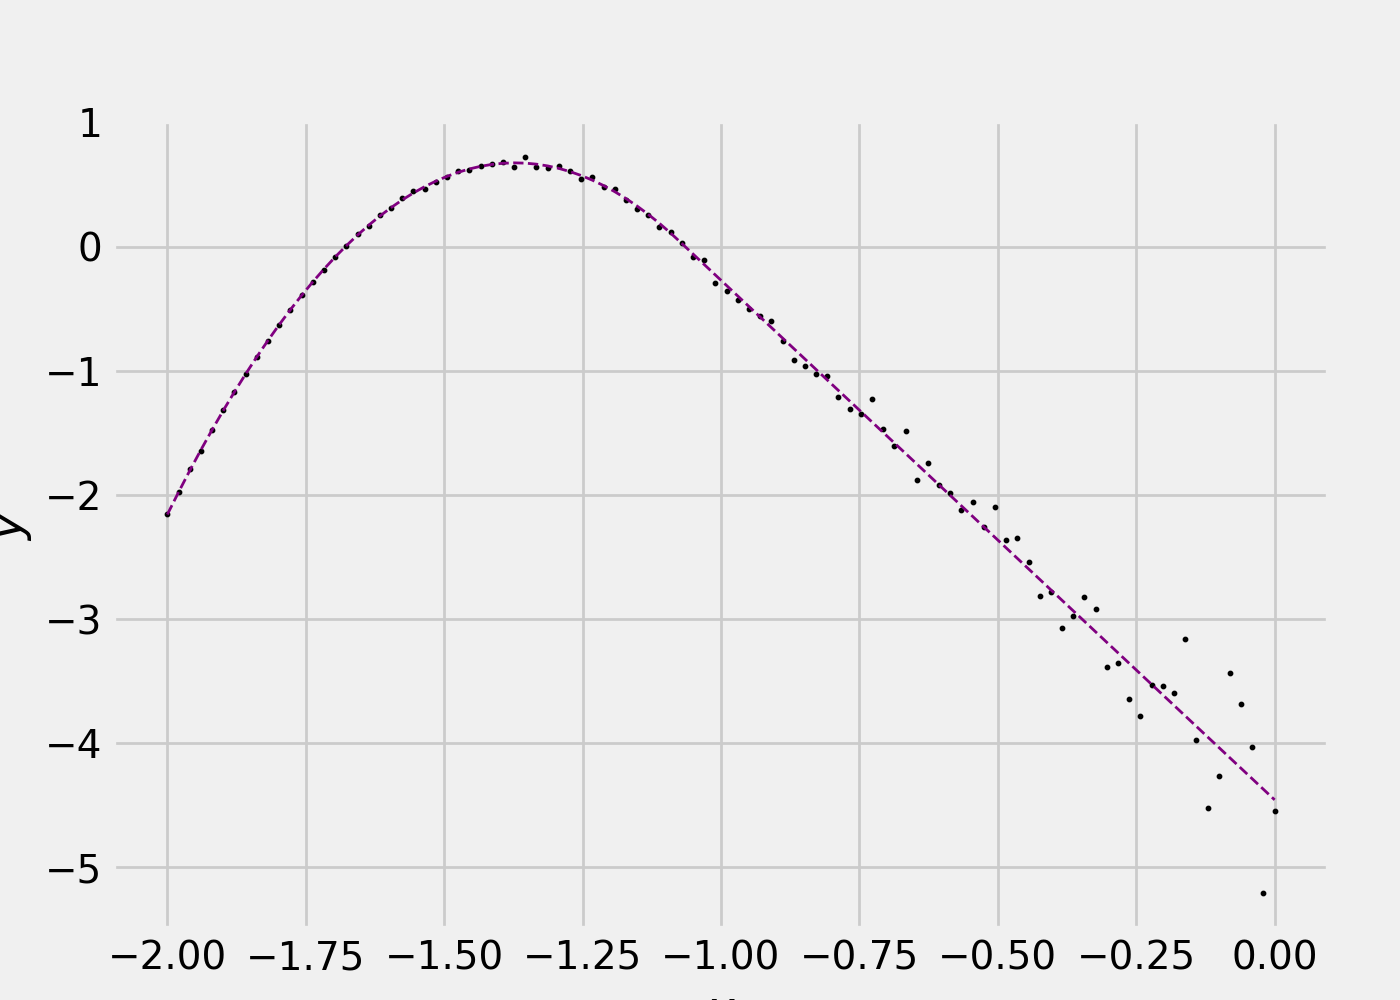

Text(0, 0.5, '$y$')

In [35]:
fig,ax = plt.subplots(figsize=(7,5))
x_arr = np.logspace(data_min,data_max,1000)
ax.scatter(np.log10(x),y,color='k',marker='.',s=10)

ax.plot(np.log10(x),
       lognorm_powerlaw_func(x,an=fit_an, mun=fit_mun, sigman=fit_sigman, mp=fit_mp, pbreak=fit_pbreak),
       color='purple',ls='--',lw=1)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')